In [1]:
from google.colab import drive
drive.mount('/content/drive/')
path= "/content/drive/MyDrive/APESTGTSTONK/assets/combinedv1_textblob.csv"

Mounted at /content/drive/


In [2]:
import pandas as pd
import datetime as datetime
import matplotlib.pyplot as plt
from matplotlib import pyplot
from pandas.plotting import autocorrelation_plot
import seaborn as sns

import os
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
from pylab import rcParams
rcParams['figure.figsize'] = 10, 6
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math
import numpy as np


In [3]:
dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m-%d')

data= pd.read_csv(path, index_col='Date', parse_dates=['Date'], date_parser=dateparse).fillna(0)
data.drop(columns=  ["High", "Low", "Adj Close", "On Balance Volume"], inplace= True)
data= data.iloc[:, 2:]
data.head(5)
series= data.iloc[:, 0:2]
series.drop(columns="Open", inplace=True)
series.head()




,Close
Date,
2016-08-21,581.307983
2016-08-22,586.752991
2016-08-23,583.414978
2016-08-24,580.182007
2016-08-25,577.760986


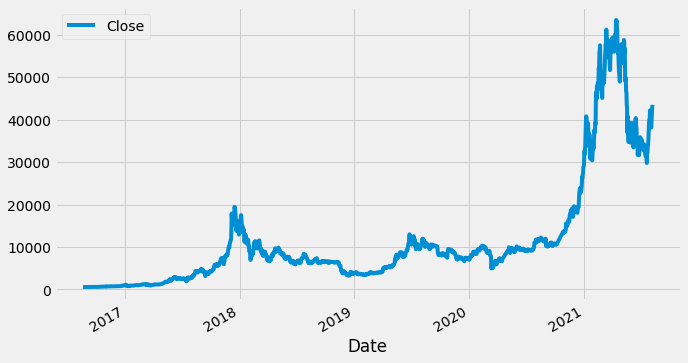

In [4]:
series.plot()
pyplot.show()

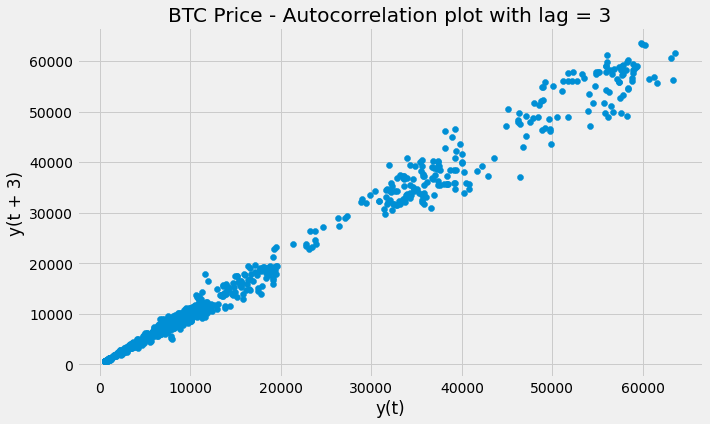

In [5]:
from pandas.plotting import lag_plot

plt.figure()
lag_plot(series, lag=3)
plt.title('BTC Price - Autocorrelation plot with lag = 3')
plt.show()

# ARIMA Model for Time Series Forecasting! 

**What is ARIMA?**
- Statistical method for time series foercasting 
- "AutoRegressive Integrated Moving Average" 
- Univariate time series 
- ARIMA "explains" a given time series based on its own past values (including its lags and lagged forecast errors)
- Transforming time series using ARIMA is better than forecasting directly

**Parameters of ARIMA Model**
- **p**: order of the Auto Regressive Term no. of lag observations in model (lag order)
- **d**: no. of differencing required to make time series stationary
- **q**: order of moving average term/ size of moving average window 


1. train ARIMA on opening prices
2. predict close prices of test dataset
3. then combine with other models technical indicators (ensemble- boosting) 


Also, a given time series is thought to consist of three systematic components including level, trend, seasonality, and one non-systematic component called noise.

These components are defined as follows:

- Level: The average value in the series.
- Trend: The increasing or decreasing value in the series.
- Seasonality: The repeating short-term cycle in the series.
- Noise: The random variation in the series.

#Stationarity
- ARIMA requires stationary datasets.
- Stationary: variance of the log of the prices increases slower than that of a random walk
- Price series are meant to be reverting, non-stationary 
- We need a stationary time series to be modelled by an ARIMA model

Why?
- ARIMA is auto-regressive. It is a linear regression that uses its own lags as predictors.
- Linear regerssion: predictors have to be independent to avoid multi-collinearity

*Get time series to be stationary/ stationary as possible

Test for Stationarity | ADF Test 
- The null hypothesis of the ADF test is that the time series is non-stationary
- If p-value of test < significance level (0.05), reject null hypothesis and infer that time series is indeed stationary 
- If p-value > 0.05, find order of differencing 

In [ ]:
series["Date"] = series.index

In [ ]:
series["Date"]= pd.to_datetime(series["Date"], format='%Y%m%d.0')
print(series)

                   Close       Date
Date                               
2016-08-21    581.307983 2016-08-21
2016-08-22    586.752991 2016-08-22
2016-08-23    583.414978 2016-08-23
2016-08-24    580.182007 2016-08-24
2016-08-25    577.760986 2016-08-25
...                  ...        ...
2021-08-03  38152.980469 2021-08-03
2021-08-04  39747.503906 2021-08-04
2021-08-05  40869.554688 2021-08-05
2021-08-06  42816.500000 2021-08-06
2021-08-07  43515.773438 2021-08-07

[1778 rows x 2 columns]


In [ ]:
# Check if price series is stationary
from statsmodels.tsa.stattools import adfuller

result = adfuller(series.Close.dropna())
print(f"ADF Statistic: {result[0]}")
print(f"p-value: {result[1]}")

ADF Statistic: -0.33419528720105385
p-value: 0.9205196882755479


#### Autocorrelation Function (ACF)

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf

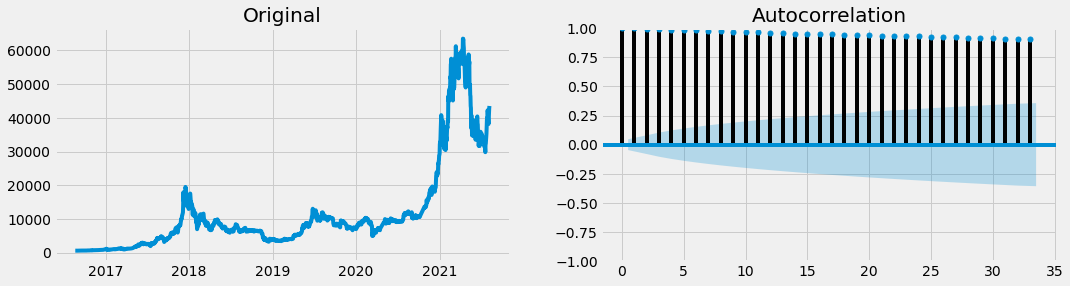

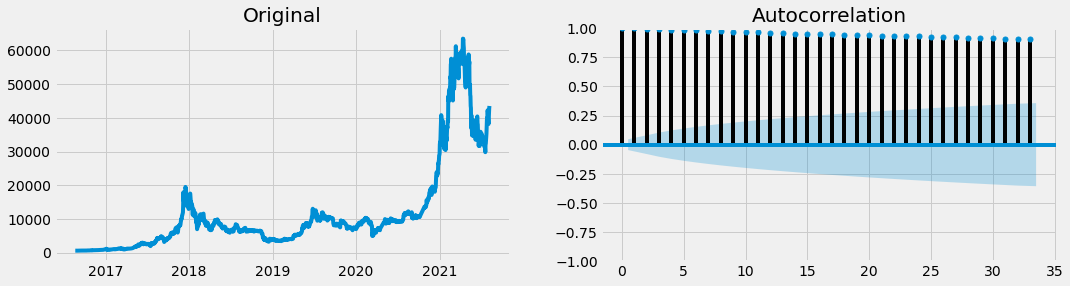

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 4))

ax1.plot(series.Close)
ax1.set_title("Original")
# add ; at the end of the plot function so that the plot is not duplicated
plot_acf(series.Close, ax=ax2)

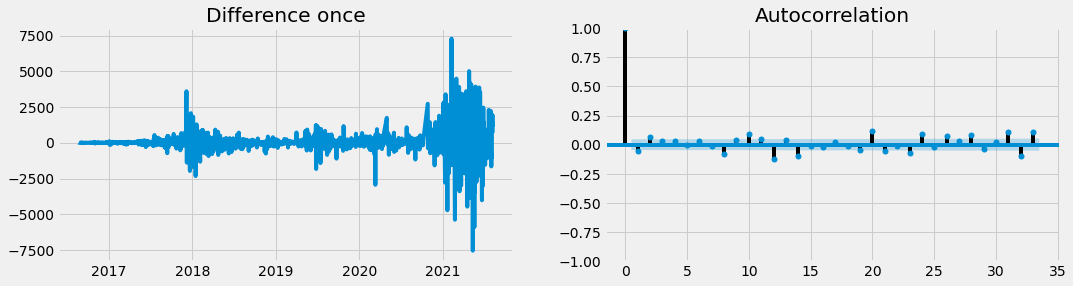

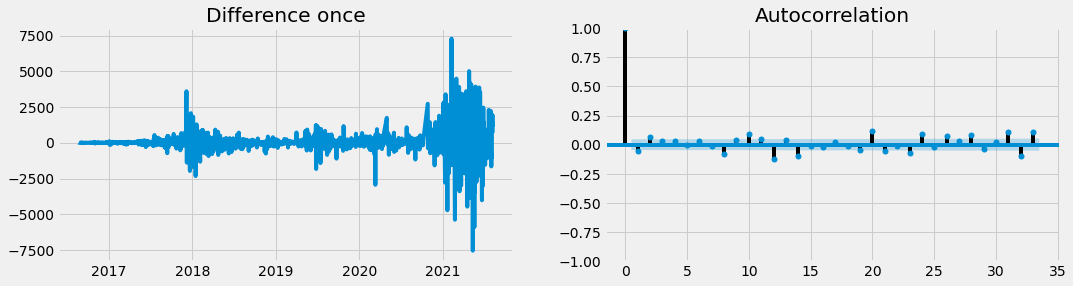

In [ ]:
diff = series.Close.diff().dropna()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 4))

ax1.plot(diff)
ax1.set_title("Difference once")
plot_acf(diff, ax=ax2)

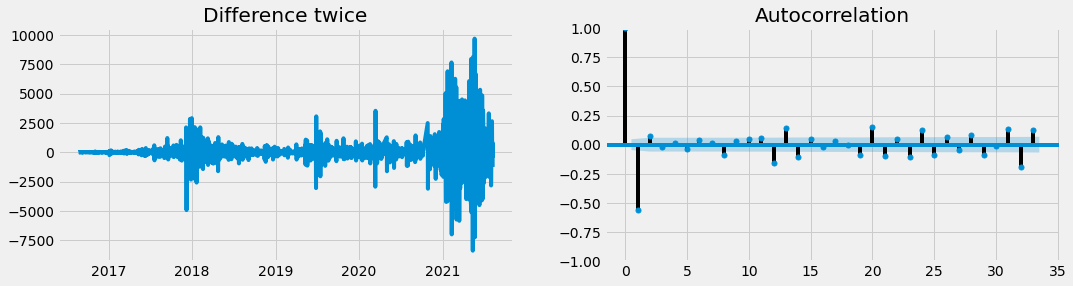

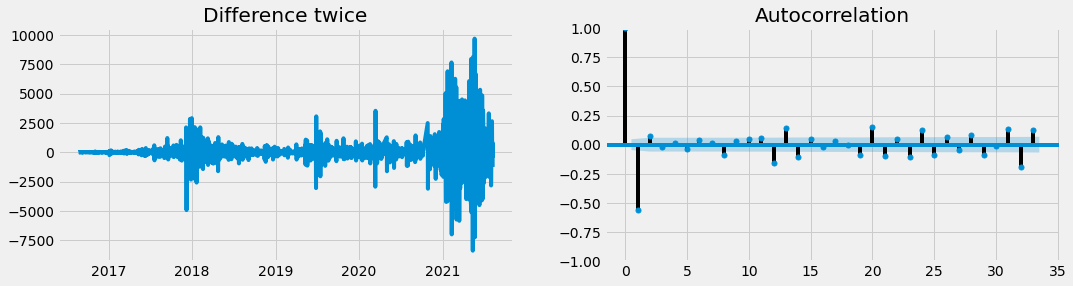

In [ ]:
diff = series.Close.diff().diff().dropna()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 4))

ax1.plot(diff)
ax1.set_title("Difference twice")
plot_acf(diff, ax=ax2)

In [ ]:
!pip install pmdarima



     |████████████████████████████████| 1.4 MB 7.5 MB/s 
     |████████████████████████████████| 9.8 MB 30.9 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


ImportError: ignored

In [ ]:
!pip install pmdarima.arima.utils
!pip install Appender

ERROR: Could not find a version that satisfies the requirement pmdarima.arima.utils (from versions: none)
ERROR: No matching distribution found for pmdarima.arima.utils
ERROR: Could not find a version that satisfies the requirement Appender (from versions: none)
ERROR: No matching distribution found for Appender


#### p

p is the order of the Auto Regressive (AR) term. It refers to the number of lags to be used as predictors. 

We can find out the required number of AR terms by inspecting the Partial Autocorrelation (PACF) plot.

The partial autocorrelation represents the correlation between the series and its lags. 

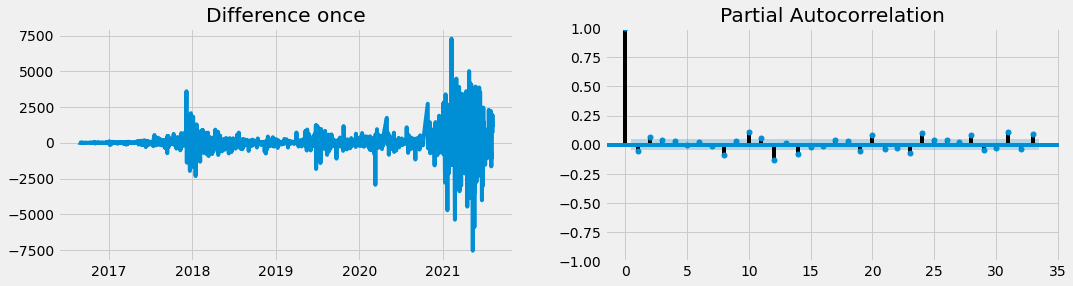

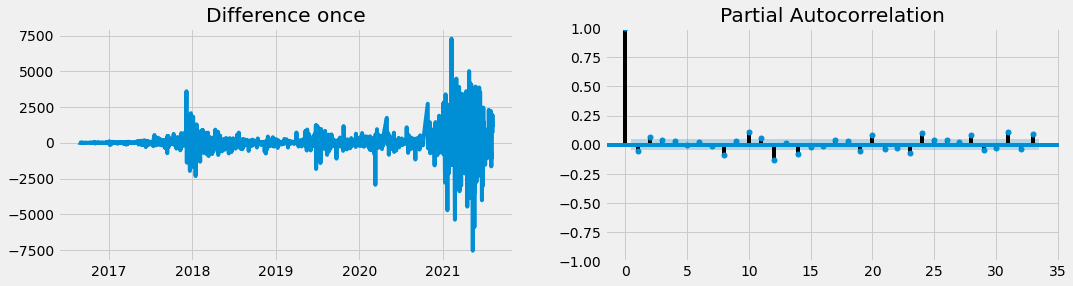

In [ ]:
from statsmodels.graphics.tsaplots import plot_pacf
diff = series.Close.diff().dropna()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 4))

ax1.plot(diff)
ax1.set_title("Difference once")
ax2.set_ylim(0, 1)
plot_pacf(diff, ax=ax2)

#### q

q is the order of the Moving Average (MA) term. It refers to the number of lagged forecast errors that should go into the ARIMA Model.

We can look at the ACF plot for the number of MA terms.

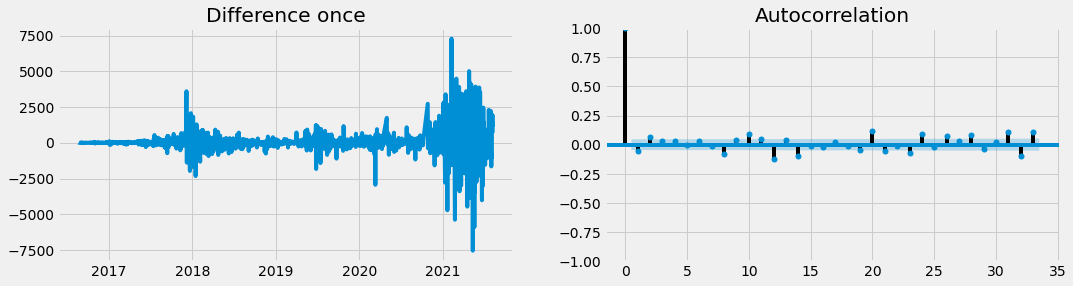

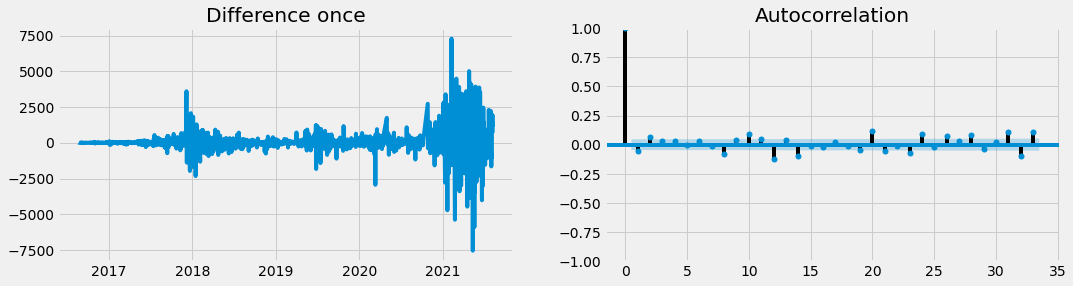

In [ ]:
diff = series.Close.diff().dropna()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 4))

ax1.plot(diff)
ax1.set_title("Difference once")
ax2.set_ylim(0, 1)
plot_acf(diff, ax=ax2)

#### Fitting the ARIMA model

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

# ARIMA Model
model = ARIMA(series.Close, order=(6, 1, 3))
result = model.fit()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:595: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:595: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:595: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


In [ ]:
print(result.summary())

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 1778
Model:                 ARIMA(6, 1, 3)   Log Likelihood              -14317.424
Date:                Thu, 21 Oct 2021   AIC                          28654.847
Time:                        16:03:28   BIC                          28709.674
Sample:                             0   HQIC                         28675.099
                               - 1778                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1599      0.169     -0.944      0.345      -0.492       0.172
ar.L2         -0.7164      0.084     -8.494      0.000      -0.882      -0.551
ar.L3          0.3125      0.148      2.106      0.0

(array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 array([-6957.32851288, -5587.29191016, -4217.25530743, -2847.21870471,
        -1477.18210199,  -107.14549926,  1262.89110346,  2632.92770618,
         4002.96430891,  5373.00091163,  6743.03751435]),
 <a list of 1778 Lists of Patches objects>)

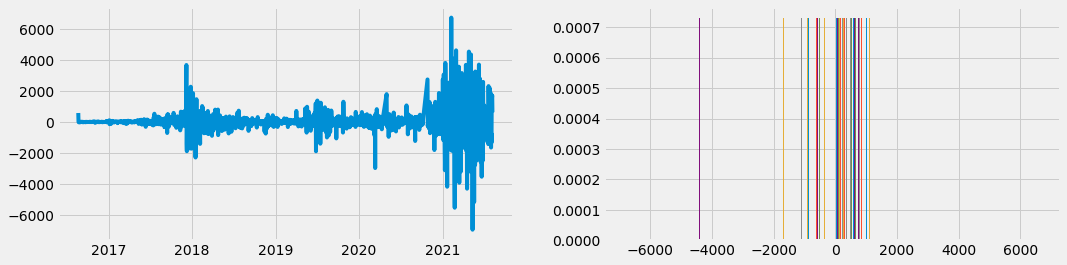

In [ ]:
# Plot residual errors
residuals = pd.DataFrame(result.resid)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 4))

ax1.plot(residuals)
ax2.hist(residuals, density=True)


In [ ]:
# Actual vs Fitted
result.get_prediction(
    start=1,
    end=60,
    dynamic=False,
)

### Train test split 

In [10]:
n = int(len(series) * 0.8)
train = series.Close[:n]
test = series.Close[n:]

print(len(train))
print(len(test))

1422
356


In [ ]:
step = 30

model = ARIMA(train, order=(6, 1, 3))
result = model.fit(disp=0)

# Forecast
fc, se, conf = result.forecast(step)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:595: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:595: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:595: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


TypeError: ignored

In [ ]:
fc = pd.Series(fc, index=test[:step].index)
lower = pd.Series(conf[:, 0], index=test[:step].index)
upper = pd.Series(conf[:, 1], index=test[:step].index)

NameError: ignored

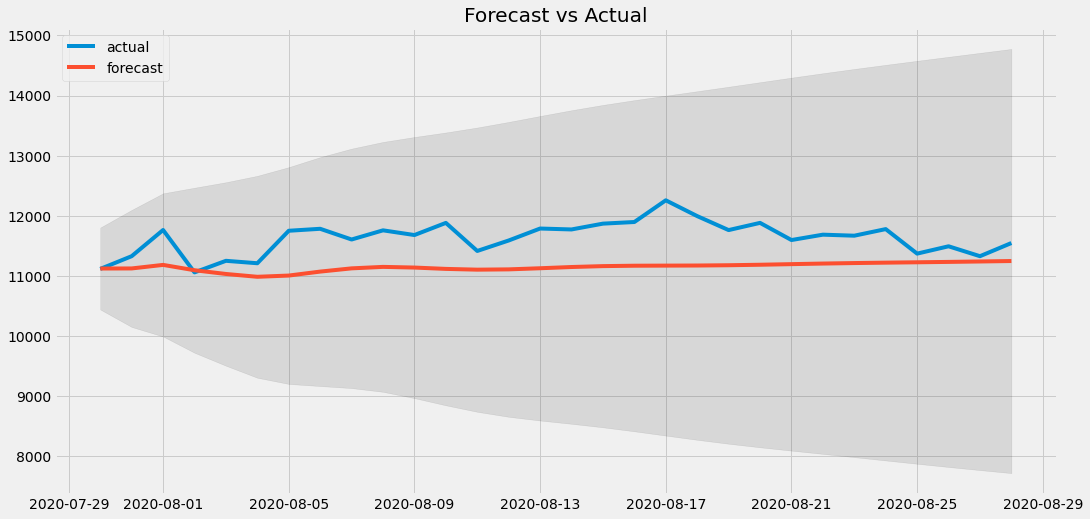

In [ ]:
plt.figure(figsize=(16, 8))
plt.plot(test[:step], label="actual")
plt.plot(fc, label="forecast")
plt.fill_between(lower.index, lower, upper, color="k", alpha=0.1)
plt.title("Forecast vs Actual")
plt.legend(loc="upper left")

In [ ]:
# save model
result.save('ARIMA_model1.pkl')

In [ ]:
loaded = ARIMAResults.load('ARIMA_model1.pkl')

NameError: ignored

#Auto ARIMA

- The pmdarima package provides an auto_arima method that uses a stepwise approach to search multiple combinations of p,d,q parameters and chooses the best model that has the least AIC.

- Auto ARIMA: Automatically discover the optimal order for an ARIMA model.
- The auto_arima function seeks to identify the most optimal parameters for an ARIMA model, and returns a fitted ARIMA model. This function is based on the commonly-used R function, forecast::auto.arima.
The auro_arima function works by conducting differencing tests (i.e., Kwiatkowski–Phillips–Schmidt–Shin, Augmented Dickey-Fuller or Phillips–Perron) to determine the order of differencing, d, and then fitting models within ranges of defined start_p, max_p, start_q, max_q ranges. If the seasonal optional is enabled, auto_arima also seeks to identify the optimal P and Q hyper- parameters after conducting the Canova-Hansen to determine the optimal order of seasonal differencing, D.

In [ ]:
!pip uninstall statsmodels 

Found existing installation: statsmodels 0.10.2
Uninstalling statsmodels-0.10.2:
  Would remove:
    /usr/local/lib/python3.7/dist-packages/statsmodels-0.10.2.dist-info/*
    /usr/local/lib/python3.7/dist-packages/statsmodels/*
Proceed (y/n)? y
  Successfully uninstalled statsmodels-0.10.2


In [ ]:
!pip install statsmodels

     |████████████████████████████████| 9.8 MB 4.1 MB/s 


In [ ]:
!pip install pmdarima

     |████████████████████████████████| 1.4 MB 2.1 MB/s 


In [ ]:

from pmdarima.arima import auto_arima

In [ ]:
model_autoARIMA = auto_arima(
    series.Close,
    start_p=1,
    start_q=1,
    test="adf",
    max_p=6,
    max_q=6,
    m=1,  # frequency of series
    d=None,  # determine 'd'
    seasonal=False,  # no seasonality
    trace=True,
    stepwise=True,
)

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=28710.288, Time=0.60 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=28714.752, Time=0.07 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=28711.800, Time=0.10 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=28712.411, Time=0.18 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=28714.456, Time=0.04 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=28705.114, Time=0.58 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=28705.954, Time=0.17 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=28706.326, Time=0.85 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=28706.531, Time=1.39 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=28704.669, Time=0.65 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=28705.500, Time=0.25 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=28706.341, Time=2.11 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=28705.401, Time=0.38 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=28707.775, Time=2.08 sec
 ARIMA(1,1,2)(0,0,0

In [ ]:
model_autoARIMA.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1778
Model:               SARIMAX(1, 1, 2)   Log Likelihood              -14347.600
Date:                Thu, 21 Oct 2021   AIC                          28703.199
Time:                        16:28:04   BIC                          28725.130
Sample:                             0   HQIC                         28711.300
                               - 1778                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5553      0.085      6.498      0.000       0.388       0.723
ma.L1         -0.6078      0.085     -7.178      0.000      -0.774      -0.442
ma.L2          0.0993      0.010      9.657      0.000       0.079       0.119
sigma2      6.064e+05   6343.432     95.596      0.000    5.94e+05    6.19e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):             30733.39
Prob(Q):                              0.98   Prob(JB):                         0.00
Heteroskedasticity (H):               8.92   Skew:                            -0.08
Prob(H) (two-sided):                  0.00   Kurtosis:                        23.37
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

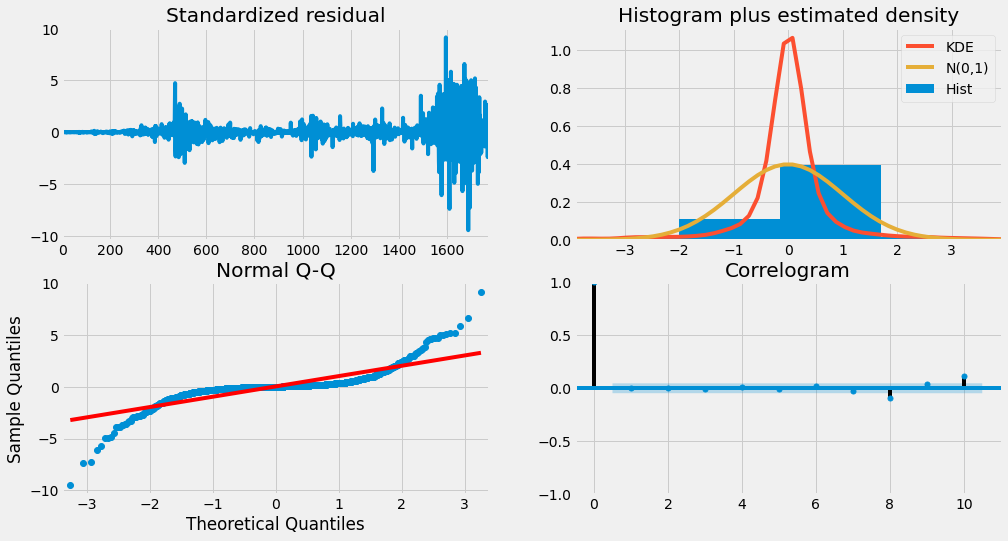

In [ ]:
model_autoARIMA.plot_diagnostics(figsize=(15,8))

plt.show()

Interpreting the plot diagnostics 

- Top left: The residual errors seem to fluctuate around a mean of zero and have a uniform variance, except for the later periods

- Top Right: The density plot suggest normal distribution with mean zero.

- Bottom left: All the dots should fall perfectly in line with the red line. Any significant deviations would imply the distribution is skewed.

- Bottom Right: The Correlogram, aka, ACF plot shows the residual errors are not autocorrelated. Any autocorrelation would imply that there is some pattern in the residual errors which are not explained in the model. So you will need to look for more X’s (predictors) to the model.

Overall, it seems to be a good fit. 
Next, create an ARIMA model with provided optimal parameters p, d and q.

In [ ]:
train_data, test_data = series[0:int(len(series)*0.7)], series[int(len(series)*0.7):]
training_data = train_data['Close'].values
test_data = test_data['Close'].values
history = [x for x in training_data]
model_predictions = []
N_test_observations = len(test_data)
for time_point in range(N_test_observations):
    model_fit = model_autoARIMA.fit(train)
    output = model_fit.predict()
    yhat = output[0]
    model_predictions.append(yhat)
    true_test_value = test_data[time_point]
    history.append(true_test_value)
MSE_error = mean_squared_error(test_data, model_predictions)
print('Testing Mean Squared Error is {}'.format(MSE_error))

KeyboardInterrupt: ignored

In [ ]:
# Forecast
fc, se, conf = fitted.forecast(int(len(df_log)*0.05), alpha=0.05)  # 95% confidence
fc_series = pd.Series(fc, index=test_data.index)
for i in conf:
    print(i)
lower_series = pd.Series(conf[:, 0], index=test_data.index)
upper_series = pd.Series(conf[:, 1], index=test_data.index)
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train_data, label='training')
plt.plot(test_data, color = 'blue', label='Actual Stock Price')
plt.plot(fc_series, color = 'orange',label='Predicted Stock Price')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.10)
plt.title('Bitcoin Price Prediction')
plt.xlabel('Time')
plt.ylabel('Actual BTC Price')
plt.legend(loc='upper left', fontsize=8)
plt.show()

#try through seasonal, add more parameters 

# Prophet
- Prophet is a facebooks’ open source time series prediction.

- Prophet decomposes time series into trend, seasonality and holiday. It has intuitive hyper parameters which are easy to tune.
Prophet time series = Trend + Seasonality + Holiday + error

In [6]:
series

,Close
Date,
2016-08-21,581.307983
2016-08-22,586.752991
2016-08-23,583.414978
2016-08-24,580.182007
2016-08-25,577.760986
...,...
2021-08-03,38152.980469
2021-08-04,39747.503906
2021-08-05,40869.554688


In [11]:
#importing prophet
from fbprophet import Prophet

#creating dataframe
new_data = pd.DataFrame(index=range(0,len(series)),columns=['Date', 'Close'])

for i in range(0,len(series)):
    new_data['Date'][i] = series.index[i]
    new_data['Close'][i] = series['Close'][i]

new_data['Date'] = pd.to_datetime(new_data.Date,format='%Y-%m-%d')
new_data.index = new_data['Date']

#preparing data
new_data.rename(columns={'Close': 'y', 'Date': 'ds'}, inplace=True)

#train and validation
n = int(len(series) * 0.8)
print(n)
train = new_data[:1422]
valid = new_data[1422:]

#fit the model
model = Prophet()
model.fit(train)

#predictions
close_prices = model.make_future_dataframe(periods=len(valid))
forecast = model.predict(close_prices)

INFO:numexpr.utils:NumExpr defaulting to 2 threads.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


1422


In [ ]:

#rmse
forecast_valid = forecast['yhat'][1422:]
rms=np.sqrt(np.mean(np.power((np.array(valid['y'])-np.array(forecast_valid)),2)))
rms

29695.906183676143

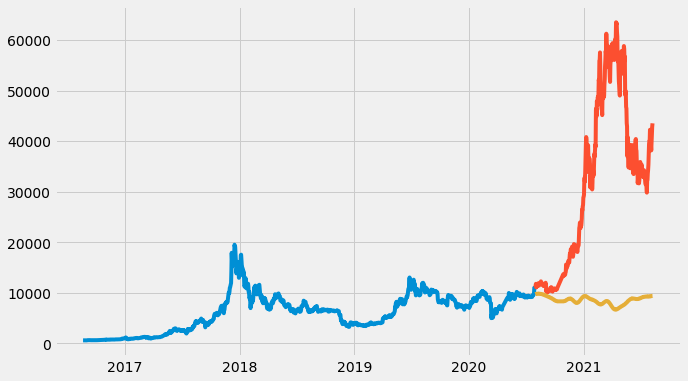

In [ ]:
#plot
valid['Predictions'] = 0
valid['Predictions'] = forecast_valid.values

plt.plot(train['y'])
plt.plot(valid[['y', 'Predictions']])

In [ ]:
future = model.make_future_dataframe(periods=411)
forecast = model.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()


,ds,yhat,yhat_lower,yhat_upper
1828,2021-09-09,9007.405757,-2473.906751,21453.499995
1829,2021-09-10,9001.604180,-2634.850381,21545.856265
1830,2021-09-11,8981.202743,-2802.219825,21464.729420
1831,2021-09-12,8929.331183,-2810.930300,21496.601870
1832,2021-09-13,8937.490707,-2736.541835,21515.328321


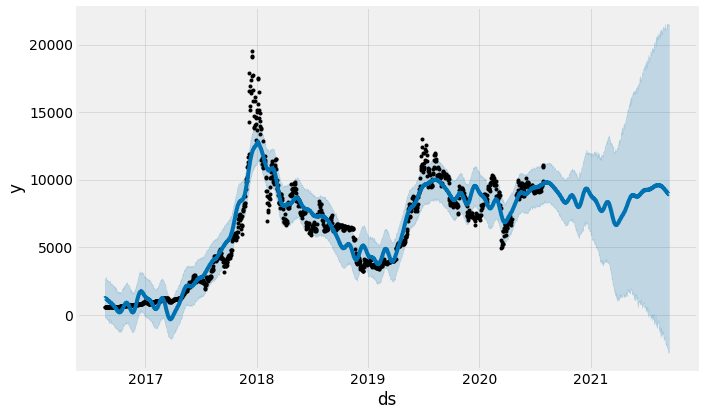

In [ ]:
fig1 = model.plot(forecast)


In [14]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
r2_score(metric_df.y, metric_df.yhat)
mean_squared_error(metric_df.y, metric_df.yhat)
mean_absolute_error(metric_df.y, metric_df.yhat)


NameError: ignored

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


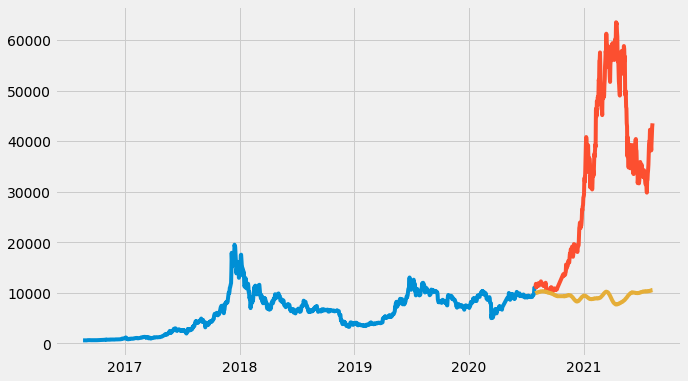

In [20]:
#importing prophet
from fbprophet import Prophet

from fbprophet.plot import add_changepoints_to_plot
m = Prophet(changepoint_prior_scale=1)
m.fit(train)





#predictions
close_prices = m.make_future_dataframe(periods=len(valid))
forecast = m.predict(close_prices)

#rmse
forecast_valid = forecast['yhat'][1422:]
rms=np.sqrt(np.mean(np.power((np.array(valid['y'])-np.array(forecast_valid)),2)))
rms
#plot
valid['Predictions'] = 0
valid['Predictions'] = forecast_valid.values

plt.plot(train['y'])
plt.plot(valid[['y', 'Predictions']])

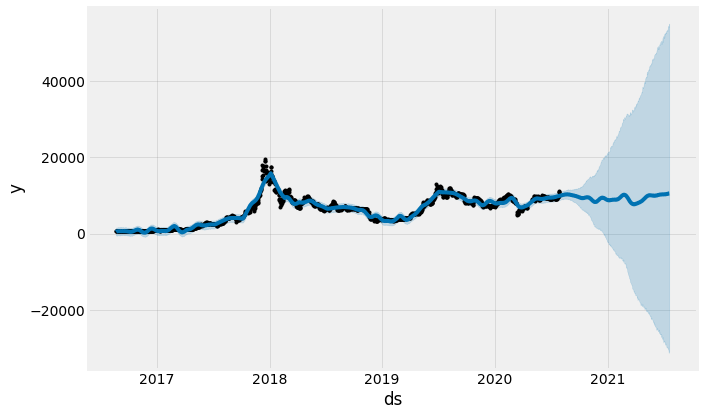

In [22]:
fig2 = m.plot(forecast)


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


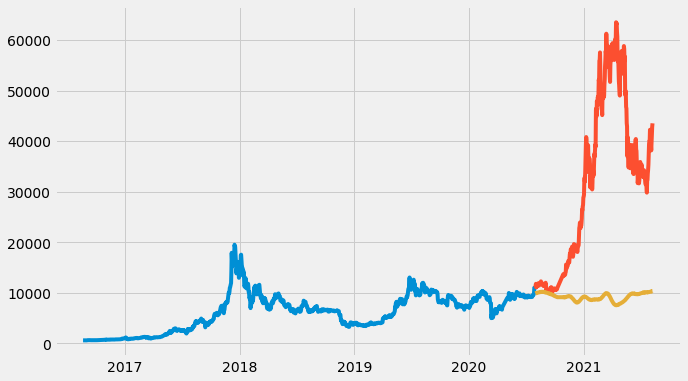

In [25]:
#importing prophet
from fbprophet import Prophet

from fbprophet.plot import add_changepoints_to_plot
m2 = Prophet(changepoint_prior_scale=1)
m2.add_seasonality(name="monthly", period=4, fourier_order=3)
m2.fit(train)




#predictions
close_prices = m2.make_future_dataframe(periods=len(valid))
forecast = m2.predict(close_prices)
#rmse
forecast_valid = forecast['yhat'][1422:]
rms=np.sqrt(np.mean(np.power((np.array(valid['y'])-np.array(forecast_valid)),2)))
rms


#plot
valid['Predictions'] = 0
valid['Predictions'] = forecast_valid.values

plt.plot(train['y'])
plt.plot(valid[['y', 'Predictions']])

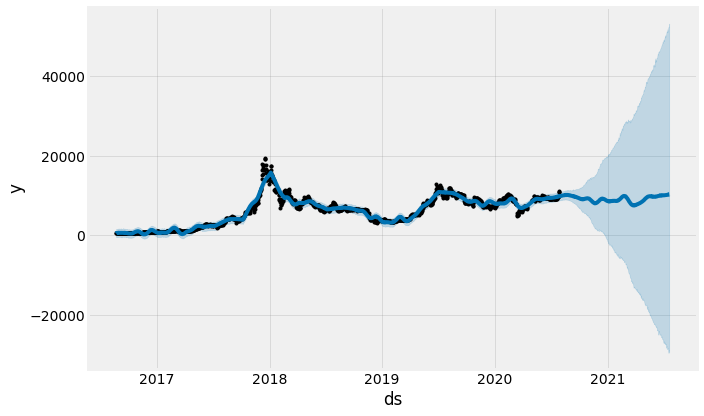

In [26]:
fig3 = m2.plot(forecast)


# Reinforcement Learning

- Reinforcement learning is another type of machine learning besides supervised and unsupervised learning. This is an agent-based learning system where the agent takes actions in an environment where the goal is to maximize the record. Reinforcement learning does not require the usage of labeled data like supervised learning.

- Reinforcement learning works very well with less historical data. It makes use of the value function and calculates it on the basis of the policy that is decided for that action

**Steps for designing a reinforcement learning model is –**
1. Importing Libraries
2. Create the agent who will make all decisions
3. Define basic functions for formatting the values, sigmoid 
4. function, reading the data file, etc
5. Train the agent
6. Evaluate the agent performance
 


In [27]:
import keras
from keras.models import Sequential
from keras.models import load_model
from keras.layers import Dense
from keras.optimizers import adam_v2
import math
import numpy as np
import random
from collections import deque

In [28]:
 class Agent():
    def __init__(self, state_size, is_eval=False, model_name=""):
            self.state_size = state_size # normalized previous days
            self.action_size = 3 # sit, buy, sell
            self.memory = deque(maxlen=1000)
            self.inventory = []
            self.model_name = model_name
            self.is_eval = is_eval
            self.gamma = 0.95
            self.epsilon = 1.0
            self.epsilon_min = 0.01
            self.epsilon_decay = 0.995
            self.model = load_model(model_name) if is_eval else self._model()
    def _model(self):
        model = Sequential()
        model.add(Dense(units=64, input_dim=self.state_size, activation="relu"))
        model.add(Dense(units=32, activation="relu"))
        model.add(Dense(units=8, activation="relu"))
        model.add(Dense(self.action_size, activation="linear"))
        model.compile(loss="mse", optimizer=adam_v2(lr=0.001))
        return model
        
    def act(self, state):
        if not self.is_eval and random.random()<= self.epsilon:
            return random.randrange(self.action_size)
        options = self.model.predict(state)
        return np.argmax(options[0])
    def expReplay(self, batch_size):
        mini_batch = []
        l = len(self.memory)
        for i in range(l - batch_size + 1, l):
            mini_batch.append(self.memory[i])
        for state, action, reward, next_state, done in mini_batch:
            target = reward
            if not done:
                target = reward + self.gamma * np.amax(self.model.predict(next_state)[0])
            target_f = self.model.predict(state)
            target_f[0][action] = target
            self.model.fit(state, target_f, epochs=1, verbose=0)
        if self.epsilon > self.epsilon_min:
            self.epsilon *= self.epsilon_decay

    def formatPrice(n):
        return("-Rs." if n<0 else "Rs.")+"{0:.2f}".format(abs(n))
    def getDataVec(key):
        vec = []
        lines = open(key+".csv","r").read().splitlines()
        for line in lines[1:]:
            #print(line)
            #print(float(line.split(",")[4]))
            vec.append(float(line.split(",")[4]))
            #print(vec)
        return vec 
    def sigmoid(x):
        return 1/(1+math.exp(-x))
    def getState(data, t, n):
        d = t - n + 1
        block = data[d:t + 1] if d >= 0 else -d * [data[0]] + data[0:t + 1] # pad with t0
        res = []
        for i in range(n - 1):
            res.append(sigmoid(block[i + 1] - block[i]))
        return np.array([res])

In [31]:
import sys
crypto_name = input("Enter crypto_name, window_size, Episode_count")
window_size = input()
episode_count = input()
crypto_name = str(crypto_name)
window_size = int(window_size)
episode_count = int(episode_count)
agent = Agent(window_size)
data = getStockDataVec(crypto_name)
l = len(data) - 1
batch_size = 32
for e in range(episode_count + 1):
    print("Episode " + str(e) + "/" + str(episode_count))
    state = getState(data, 0, window_size + 1)
    total_profit = 0
    agent.inventory = []
    for t in range(l):
        action = agent.act(state)
        # sit
        next_state = getState(data, t + 1, window_size + 1)
        reward = 0
        if action == 1: # buy
            agent.inventory.append(data[t])
            print("Buy: " + formatPrice(data[t]))
        elif action == 2 and len(agent.inventory) > 0: # sell
            bought_price = window_size_price = agent.inventory.pop(0)
            reward = max(data[t] - bought_price, 0)
            total_profit += data[t] - bought_price
            print("Sell: " + formatPrice(data[t]) + " | Profit: " + formatPrice(data[t] - bought_price))
        done = True if t == l - 1 else False
        agent.memory.append((state, action, reward, next_state, done))
        state = next_state
        if done:
            print("--------------------------------")
            print("Total Profit: " + formatPrice(total_profit))
            print("--------------------------------")
        if len(agent.memory) > batch_size:
            agent.expReplay(batch_size)
    if e % 10 == 0:
        agent.model.save(str(e))

Enter crypto_name, window_size, Episode_countbtc
1
1


TypeError: ignored

In [ ]:
#evaluation model 

stock_name = input("Enter Stock_name, Model_name")
model_name = input()
model = load_model(model_name)
window_size = model.layers[0].input.shape.as_list()[1]
agent = Agent(window_size, True, model_name)
data = getStockDataVec(stock_name)
print(data)
l = len(data) - 1
batch_size = 32
state = getState(data, 0, window_size + 1)
print(state)
total_profit = 0
agent.inventory = []
print(l)
for t in range(l):
    action = agent.act(state)
    print(action)
    # sit
    next_state = getState(data, t + 1, window_size + 1)
    reward = 0
    if action == 1: # buy
        agent.inventory.append(data[t])
        print("Buy: " + formatPrice(data[t]))
    elif action == 2 and len(agent.inventory) > 0: # sell
        bought_price = agent.inventory.pop(0)
        reward = max(data[t] - bought_price, 0)
        total_profit += data[t] - bought_price
        print("Sell: " + formatPrice(data[t]) + " | Profit: " + formatPrice(data[t] - bought_price))
    done = True if t == l - 1 else False
    agent.memory.append((state, action, reward, next_state, done))
    state = next_state
    if done:
        print("--------------------------------")
        print(stock_name + " Total Profit: " + formatPrice(total_profit))
        print("--------------------------------")
        print ("Total profit is:",formatPrice(total_profit))

# we need a rule-based policy 
- formulate reinforcement learning
- have an agent that takes actions in the environment
-agent  chooses action to take based on policy
- we decide the policy



Q-learning


In [1]:
!pip install tensorflow-gpu==1.15.0 tensorflow==1.15.0 stable-baselines gym-anytrading gym


     |████████████████████████████████| 411.5 MB 8.8 kB/s 
     |████████████████████████████████| 412.3 MB 30 kB/s 
     |████████████████████████████████| 240 kB 72.4 MB/s 
     |████████████████████████████████| 171 kB 72.4 MB/s 
     |████████████████████████████████| 503 kB 75.4 MB/s 
     |████████████████████████████████| 50 kB 6.4 MB/s 
     |████████████████████████████████| 3.8 MB 46.4 MB/s 
  Created wheel for gast: filename=gast-0.2.2-py3-none-any.whl size=7554 sha256=52c0163f7f8bed0956f4d7ac8254bb27c76e0b284ee33fa6dcf7679ea4678b0b
  Stored in directory: /root/.cache/pip/wheels/21/7f/02/420f32a803f7d0967b48dd823da3f558c5166991bfd204eef3
Successfully built gast
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.6.0
    Uninstalling tensorflow-estimator-2.6.0:
      Successfully uninstalled tensorflow-estimator-2.6.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.6.0
    Uninstalling tensorb

In [2]:
# Gym stuff
import gym
import gym_anytrading

# Stable baselines - rl stuff
from stable_baselines.common.vec_env import DummyVecEnv
from stable_baselines import A2C

# Processing libraries
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.



/usr/local/lib/python3.7/dist-packages/stable_baselines/__init__.py:33: UserWarning: stable-baselines is in maintenance mode, please use [Stable-Baselines3 (SB3)](https://github.com/DLR-RM/stable-baselines3) for an up-to-date version. You can find a [migration guide](https://stable-baselines3.readthedocs.io/en/master/guide/migration.html) in SB3 documentation.
  "stable-baselines is in maintenance mode, please use [Stable-Baselines3 (SB3)](https://github.com/DLR-RM/stable-baselines3) for an up-to-date version. You can find a [migration guide](https://stable-baselines3.readthedocs.io/en/master/guide/migration.html) in SB3 documentation."


In [9]:
path= "/content/drive/MyDrive/APESTGTSTONK/assets/combinedv1_textblob.csv"

dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m-%d')

data= pd.read_csv(path, index_col='Date', parse_dates=['Date'], date_parser=dateparse).fillna(0)
data.drop(columns=  ["Adj Close", "On Balance Volume"], inplace= True)
data= data.iloc[:, 2:]
data.head(5)
df= data.iloc[:, 0:5]
df.head()




/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  This is separate from the ipykernel package so we can avoid doing imports until


,Open,High,Low,Close,Volume
Date,,,,,
2016-08-21,581.939026,584.158020,580.218018,581.307983,38299400.0
2016-08-22,581.310974,588.447998,580.593994,586.752991,72844000.0
2016-08-23,586.770996,589.473999,581.633972,583.414978,85349200.0
2016-08-24,583.411987,583.590027,579.854980,580.182007,56328200.0
2016-08-25,580.179993,580.450989,575.166992,577.760986,136130000.0


In [10]:
env = gym.make('stocks-v0', df=df, frame_bound=(5,100), window_size=5)


In [11]:
env.signal_features


array([[ 5.81307983e+02,  0.00000000e+00],
       [ 5.86752991e+02,  5.44500800e+00],
       [ 5.83414978e+02, -3.33801300e+00],
       [ 5.80182007e+02, -3.23297100e+00],
       [ 5.77760986e+02, -2.42102100e+00],
       [ 5.79651001e+02,  1.89001500e+00],
       [ 5.69947021e+02, -9.70398000e+00],
       [ 5.73911987e+02,  3.96496600e+00],
       [ 5.74106995e+02,  1.95008000e-01],
       [ 5.77502991e+02,  3.39599600e+00],
       [ 5.75471985e+02, -2.03100600e+00],
       [ 5.72302979e+02, -3.16900600e+00],
       [ 5.75536987e+02,  3.23400800e+00],
       [ 5.98211975e+02,  2.26749880e+01],
       [ 6.08633972e+02,  1.04219970e+01],
       [ 6.06590027e+02, -2.04394500e+00],
       [ 6.10435974e+02,  3.84594700e+00],
       [ 6.14544006e+02,  4.10803200e+00],
       [ 6.26315979e+02,  1.17719730e+01],
       [ 6.22861023e+02, -3.45495600e+00],
       [ 6.23508972e+02,  6.47949000e-01],
       [ 6.06718994e+02, -1.67899780e+01],
       [ 6.08242981e+02,  1.52398700e+00],
       [ 6.

## 2. Build Environment

In [12]:
#2. build environment
env.action_space





Discrete(2)

info {'total_reward': 114.23510799999849, 'total_profit': 0.8021193843384677, 'position': 0}


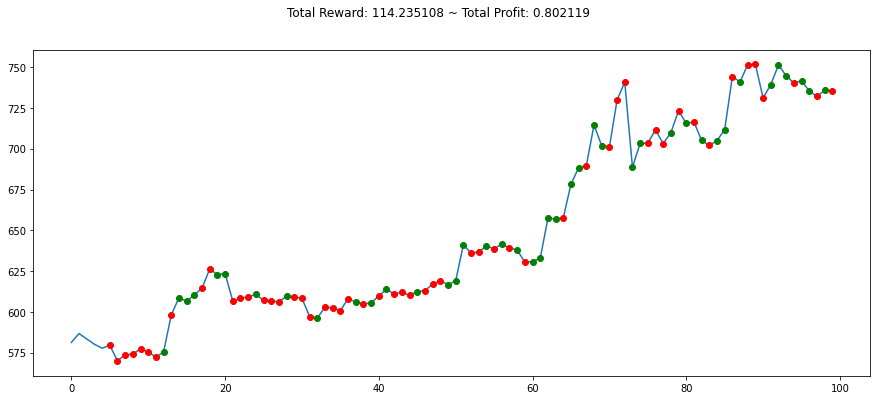

In [13]:
state = env.reset()
while True: 
    action = env.action_space.sample()
    n_state, reward, done, info = env.step(action)
    if done: 
        print("info", info)
        break
        
plt.figure(figsize=(15,6))
plt.cla()
env.render_all()
plt.show()

## 3. Build Environment and Train

In [14]:
env_maker = lambda: gym.make('stocks-v0', df=df, frame_bound=(5,100), window_size=5)
env = DummyVecEnv([env_maker])

In [32]:

model = A2C('MlpLstmPolicy', env, verbose=1) 
model.learn(total_timesteps=1000000)

---------------------------------
| explained_variance | 0.796    |
| fps                | 603      |
| nupdates           | 2900     |
| policy_entropy     | 0.556    |
| total_timesteps    | 14500    |
| value_loss         | 12.2     |
---------------------------------
---------------------------------
| explained_variance | 0.238    |
| fps                | 603      |
| nupdates           | 3000     |
| policy_entropy     | 0.65     |
| total_timesteps    | 15000    |
| value_loss         | 0.229    |
---------------------------------


KeyboardInterrupt: ignored

## 4. Evaluation

In [33]:

env = gym.make('stocks-v0', df=df, frame_bound=(90,110), window_size=5)
obs = env.reset()
while True: 
    obs = obs[np.newaxis, ...]
    action, _states = model.predict(obs)
    obs, rewards, done, info = env.step(action)
    if done:
        print("info", info)
        break

info {'total_reward': 31.894958999999744, 'total_profit': 0.9843878170340493, 'position': 1}


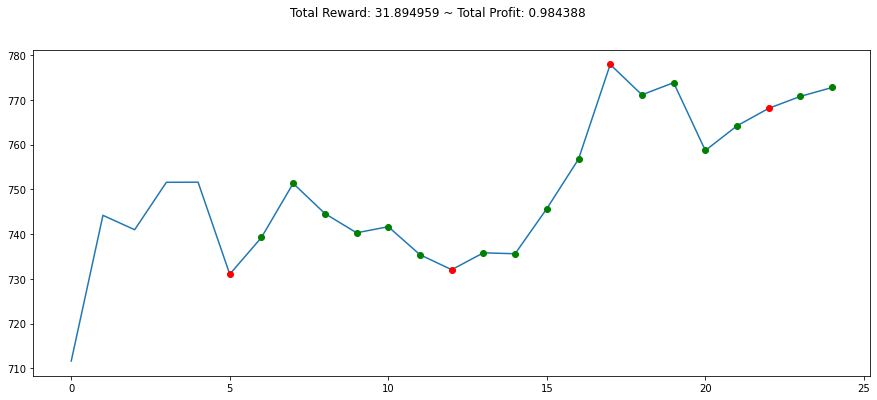

In [34]:
plt.figure(figsize=(15,6))
plt.cla()
env.render_all()
plt.show()

In [ ]:
#test again

In [61]:

model = A2C('MlpLstmPolicy', env, verbose=1) 
model.learn(total_timesteps=1000000)

Wrapping the env in a DummyVecEnv.
---------------------------------
| explained_variance | -0.00597 |
| fps                | 22       |
| nupdates           | 1        |
| policy_entropy     | 0.693    |
| total_timesteps    | 5        |
| value_loss         | 16.9     |
---------------------------------
---------------------------------
| explained_variance | -0.00276 |
| fps                | 477      |
| nupdates           | 100      |
| policy_entropy     | 0.693    |
| total_timesteps    | 500      |
| value_loss         | 29.4     |
---------------------------------
----------------------------------
| explained_variance | -4.53e-06 |
| fps                | 536       |
| nupdates           | 200       |
| policy_entropy     | 0.693     |
| total_timesteps    | 1000      |
| value_loss         | 61.5      |
----------------------------------
---------------------------------
| explained_variance | -0.0025  |
| fps                | 562      |
| nupdates           | 300      |
| pol

KeyboardInterrupt: ignored

In [55]:

env = gym.make('stocks-v0', df=df, frame_bound=(90,110), window_size=5)
obs = env.reset()
while True: 
    obs = obs[np.newaxis, ...]
    action, _states = model.predict(obs)
    obs, rewards, done, info = env.step(action)
    if done:
        print("info", info)
        break

info {'total_reward': -4.425963999999681, 'total_profit': 0.9221421882406715, 'position': 0}


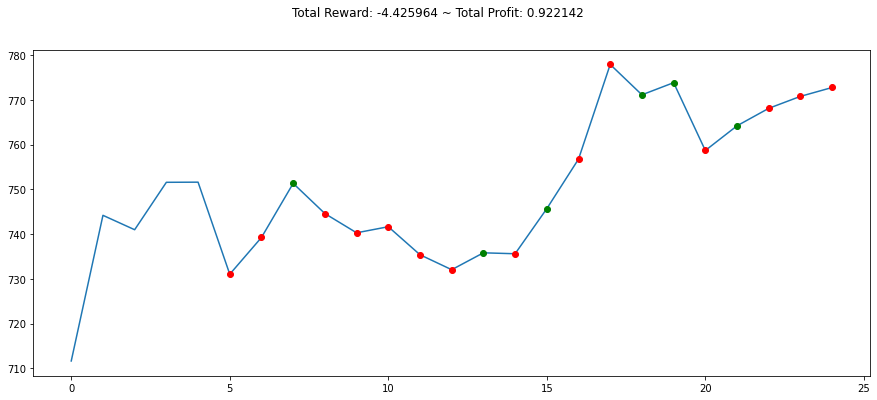

In [56]:
plt.figure(figsize=(15,6))
plt.cla()
env.render_all()
plt.show()

#Add in TA

In [63]:
!pip install finta

In [64]:

from gym_anytrading.envs import StocksEnv
from finta import TA

In [70]:
path= "/content/drive/MyDrive/APESTGTSTONK/assets/combinedv1_textblob.csv"

dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m-%d')

data= pd.read_csv(path, index_col='Date', parse_dates=['Date'], date_parser=dateparse).fillna(0)
data.drop(columns=  ["Adj Close", "On Balance Volume"], inplace= True)
data= data.iloc[:, 2:]
data.head(5)
df= data.iloc[:, 0:7]
df.head()




/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  This is separate from the ipykernel package so we can avoid doing imports until


,Open,High,Low,Close,Volume,SMA14,RSI
Date,,,,,,,
2016-08-21,581.939026,584.158020,580.218018,581.307983,38299400.0,581.039010,45.502580
2016-08-22,581.310974,588.447998,580.593994,586.752991,72844000.0,580.731794,53.052302
2016-08-23,586.770996,589.473999,581.633972,583.414978,85349200.0,580.418505,48.606749
2016-08-24,583.411987,583.590027,579.854980,580.182007,56328200.0,579.567003,44.699901
2016-08-25,580.179993,580.450989,575.166992,577.760986,136130000.0,578.755646,41.978819


In [83]:
def add_signals(env):
    start = env.frame_bound[0] - env.window_size
    end = env.frame_bound[1]
    prices = env.df.loc[:, 'Low'].to_numpy()[start:end]
    signal_features = env.df.loc[:, ['Low', 'Volume','SMA14', 'RSI']].to_numpy()[start:end]
    return prices, signal_features

In [84]:

class MyCustomEnv(StocksEnv):
    _process_data = add_signals
    
env2 = MyCustomEnv(df=df,   window_size=12, frame_bound=(12,50))

In [85]:
env2.signal_features


array([[5.80218018e+02, 3.82994000e+07, 5.81039010e+02, 4.55025803e+01],
       [5.80593994e+02, 7.28440000e+07, 5.80731794e+02, 5.30523016e+01],
       [5.81633972e+02, 8.53492000e+07, 5.80418505e+02, 4.86067491e+01],
       [5.79854980e+02, 5.63282000e+07, 5.79567003e+02, 4.46999009e+01],
       [5.75166992e+02, 1.36130000e+08, 5.78755646e+02, 4.19788190e+01],
       [5.76857971e+02, 4.88568000e+07, 5.78190787e+02, 4.48036767e+01],
       [5.68630005e+02, 5.96983000e+07, 5.77073573e+02, 3.53006485e+01],
       [5.69739990e+02, 8.63016000e+07, 5.77319214e+02, 4.08235992e+01],
       [5.73465027e+02, 1.10398000e+08, 5.77809714e+02, 4.10899526e+01],
       [5.74114014e+02, 7.03424000e+07, 5.77814283e+02, 4.56756333e+01],
       [5.73642029e+02, 7.58408960e+07, 5.77975425e+02, 4.34950007e+01],
       [5.71814026e+02, 7.69234000e+07, 5.77831495e+02, 4.02648654e+01],
       [5.70810974e+02, 7.99108000e+07, 5.77824851e+02, 4.47724114e+01],
       [5.74056030e+02, 1.59014000e+08, 5.79004490e

In [86]:
df.head()


,Open,High,Low,Close,Volume,SMA14,RSI
Date,,,,,,,
2016-08-21,581.939026,584.158020,580.218018,581.307983,38299400.0,581.039010,45.502580
2016-08-22,581.310974,588.447998,580.593994,586.752991,72844000.0,580.731794,53.052302
2016-08-23,586.770996,589.473999,581.633972,583.414978,85349200.0,580.418505,48.606749
2016-08-24,583.411987,583.590027,579.854980,580.182007,56328200.0,579.567003,44.699901
2016-08-25,580.179993,580.450989,575.166992,577.760986,136130000.0,578.755646,41.978819


In [87]:

env_maker = lambda: env2
env = DummyVecEnv([env_maker])

In [89]:

model = A2C('MlpLstmPolicy', env, verbose=1) 
model.learn(total_timesteps=1000000)

---------------------------------
| explained_variance | 0.00198  |
| fps                | 20       |
| nupdates           | 1        |
| policy_entropy     | 0.693    |
| total_timesteps    | 5        |
| value_loss         | 204      |
---------------------------------
---------------------------------
| explained_variance | -590     |
| fps                | 466      |
| nupdates           | 100      |
| policy_entropy     | 0.689    |
| total_timesteps    | 500      |
| value_loss         | 0.00053  |
---------------------------------
---------------------------------
| explained_variance | -0.281   |
| fps                | 530      |
| nupdates           | 200      |
| policy_entropy     | 0.692    |
| total_timesteps    | 1000     |
| value_loss         | 0.00725  |
---------------------------------
---------------------------------
| explained_variance | 0.0335   |
| fps                | 554      |
| nupdates           | 300      |
| policy_entropy     | 0.688    |
| total_timest

KeyboardInterrupt: ignored

In [96]:

env = MyCustomEnv(df=df, window_size=12, frame_bound=(200,250))
obs = env.reset()
while True: 
    obs = obs[np.newaxis, ...]
    action, _states = model.predict(obs)
    obs, rewards, done, info = env.step(action)
    if done:
        print("info", info)
        break

info {'total_reward': 32.130066000000056, 'total_profit': 1.0691582161717623, 'position': 1}


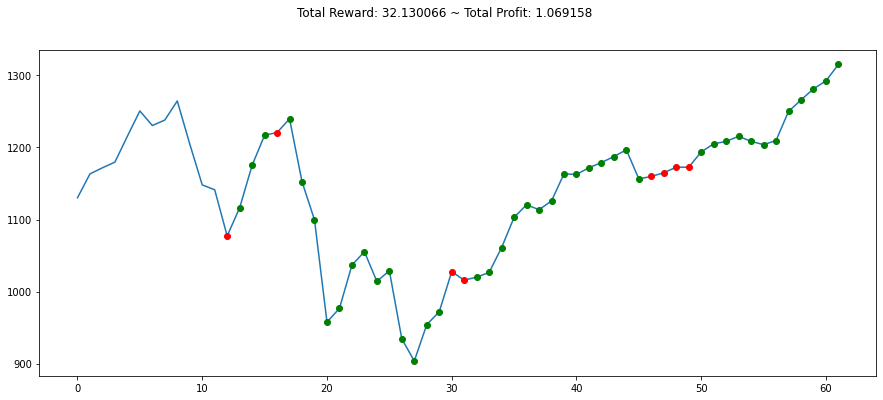

In [97]:
plt.figure(figsize=(15,6))
plt.cla()
env.render_all()
plt.show()